In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. An introduction to the problem and the main conclusion of the paper.

# 2. A description of the historical/sociological/economic context of the studied inequity, as well as a description of the inequity itself. This section should put the inequity in the context of the qualitative theories of justice, equality, and power structures covered in class.

# 3. A description of the observed data and in what ways it is appropriate for investigating the inequity at hand, and in what ways it fails to capture needed information for your study (making reference to material on measurement and power in week 2. This portion will be backed by data. 

In [2]:
data = pd.read_csv('ca_san_diego_2020_04_01.csv').drop('raw_row_number', axis=1)
data

,date,time,service_area,subject_age,subject_race,subject_sex,type,arrest_made,citation_issued,warning_issued,outcome,contraband_found,search_conducted,search_person,search_vehicle,search_basis,reason_for_search,reason_for_stop,raw_action_taken,raw_subject_race_description
0,2014-01-01,01:25:00,110,24.0,white,male,vehicular,False,True,False,citation,NaN,False,False,False,NaN,NaN,Moving Violation,Citation,WHITE
1,2014-01-01,05:47:00,320,42.0,white,male,vehicular,False,False,True,warning,NaN,False,False,False,NaN,NaN,Moving Violation,Verbal Warning,WHITE
2,2014-01-01,07:46:00,320,29.0,asian/pacific islander,male,vehicular,False,False,True,warning,NaN,False,False,False,NaN,NaN,Moving Violation,Verbal Warning,LAOTIAN
3,2014-01-01,08:10:00,610,23.0,white,male,vehicular,False,True,False,citation,NaN,False,False,False,NaN,NaN,Moving Violation,Citation,WHITE
4,2014-01-01,08:35:00,930,35.0,hispanic,male,vehicular,False,True,False,citation,NaN,False,False,False,NaN,NaN,Equipment Violation,Citation,HISPANIC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383022,NaN,NaN,620,NaN,NaN,NaN,vehicular,NaN,True,True,citation,NaN,False,False,False,NaN,NaN,NA|Equipment Violation|NA|NA|NA|NA|NA|Moving V...,Verbal Warning|NA|Citation|Citation|NA|NA|NA|C...,NaN
383023,NaN,NaN,710,NaN,NaN,NaN,vehicular,NaN,True,False,citation,NaN,False,False,False,NaN,NaN,NA|Moving Violation,NA|Citation,NaN
383024,2014-12-22,NaN,720,NaN,NaN,NaN,vehicular,False,True,False,citation,NaN,False,False,False,NaN,NaN,Moving Violation,Citation,NaN
383025,NaN,NaN,810,NaN,NaN,NaN,vehicular,NaN,True,False,citation,NaN,False,False,False,NaN,NaN,Moving Violation,Citation|NA,NaN


In [3]:
race_pct = data.value_counts('subject_race') / data.shape[0]
race_pct.to_frame('% of total stops').reset_index()

,subject_race,% of total stops
0,white,0.423537
1,hispanic,0.305678
2,black,0.111493
3,asian/pacific islander,0.084957
4,other,0.071112


In [4]:
search_pct = data.pivot_table(index='subject_race', values='search_conducted', aggfunc='mean').reset_index()

In [5]:
search_pct.columns = ['subject_race', '% of stops searched']
search_pct

,subject_race,% of stops searched
0,asian/pacific islander,0.027965
1,black,0.090692
2,hispanic,0.055525
3,other,0.016558
4,white,0.027801


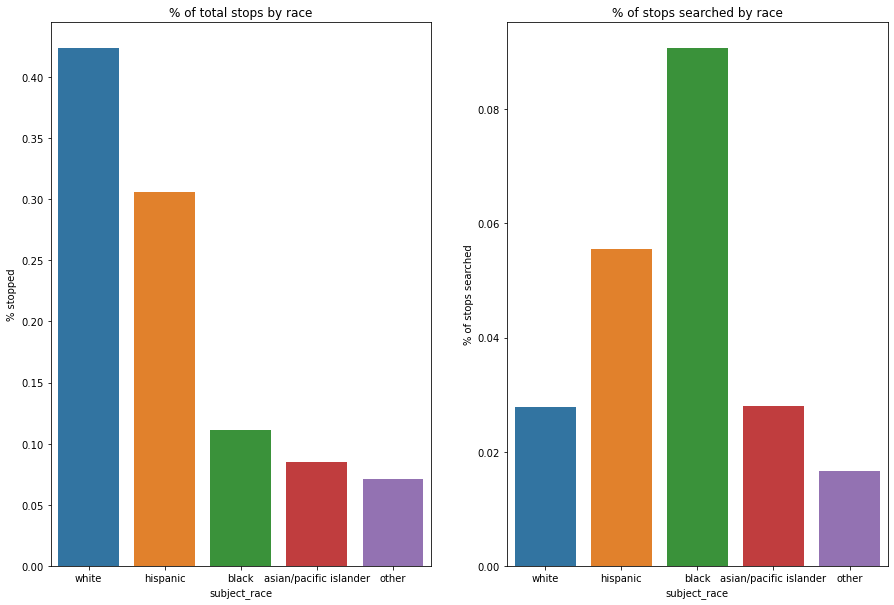

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(15, 10))
p1 = sns.barplot(x=race_pct.index, y=race_pct.values, ax=ax[0], order=['white', 'hispanic', 'black', 'asian/pacific islander', 'other'])
p2 = sns.barplot(data=search_pct, x='subject_race', y='% of stops searched', ax=ax[1], order=['white', 'hispanic', 'black', 'asian/pacific islander', 'other'])
p1_lab = p1.set(ylabel='% stopped', title='% of total stops by race')
p2_lab = p2.set(ylabel='% of stops searched', title='% of stops searched by race')

In [7]:
# tmp = data[data['search_conducted'] == 1][['subject_age', 'subject_race', 'subject_sex', 'search_conducted', 'contraband_found']]
# tmp['contraband_found'] = tmp['contraband_found'].convert_dtypes()
# gb = tmp.groupby('subject_race')[['contraband_found']].mean()
# gb.reset_index()

In [8]:
gb = data.groupby('subject_race')[['arrest_made']].mean().reset_index()
gb

,subject_race,arrest_made
0,asian/pacific islander,0.010286
1,black,0.021726
2,hispanic,0.016527
3,other,0.006513
4,white,0.011836


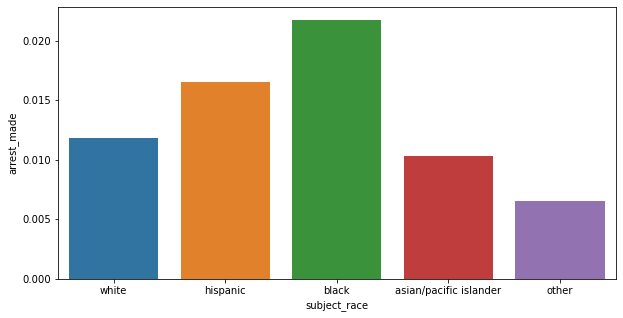

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
p3 = sns.barplot(x=gb['subject_race'], y=gb['arrest_made'], ax=ax, order=['white', 'hispanic', 'black', 'asian/pacific islander', 'other'])

In [10]:
# gb = data.groupby('subject_race')[['warning_issued']].mean().reset_index()
# gb

In [11]:
# gb = data.groupby('subject_race')[['citation_issued']].mean().reset_index()
# gb

In [12]:
# fig, ax = plt.subplots(1, 1, figsize=(10, 5))
# p3 = sns.barplot(x=gb.index, y=gb.values.flatten(), ax=ax, order=['white', 'hispanic', 'black', 'asian/pacific islander', 'other'])
# p3_lab = p3.set(ylabel='% contraband found', title='% contraband found by race')

# 4. A description of the quantitative measures of fairness that you used in your investigation, why they are appropriate for the given context, alongside the results of those calculations.

In [13]:
# disparate impact white searches / black searches
search_pct['% of stops searched'][4] / search_pct['% of stops searched'][1]

0.30654011158831

In [14]:
# disparate impact white searches / hispanic searches
search_pct['% of stops searched'][4] / search_pct['% of stops searched'][2] 

0.500690968541453

In [15]:
# disparate impact white arrests / black arrests
gb['arrest_made'][4] / gb['arrest_made'][1] 

0.5447636502794151

In [16]:
# disparate impact white arrests / hispanic arrests
gb['arrest_made'][4] / gb['arrest_made'][2] 

0.7161615278758832

In [17]:
# # tp parity
# tp = data[(data['search_conducted'] == 1) & (data['contraband_found'] == 1)]
# tp_gb = (tp.groupby('subject_race').size() / tp.shape[0]).reset_index()
# tp_gb.columns = ['subject_race', 'true positive %']
# tp_gb

In [18]:
# # fp parity
# fp = data[(data['search_conducted'] == 1) & (data['contraband_found'] == 0)]
# fp_gb = (fp.groupby('subject_race').size() / fp.shape[0]).reset_index()
# fp_gb.columns = ['subject_race', 'false positive %']
# fp_gb

In [19]:
# fig, ax = plt.subplots(1, 2, figsize=(15, 5))
# p4 = sns.barplot(x=tp_gb['subject_race'], y=tp_gb['true positive %'], ax=ax[0], order=['white', 'hispanic', 'black', 'asian/pacific islander', 'other'])
# p5 = sns.barplot(x=fp_gb['subject_race'], y=fp_gb['false positive %'], ax=ax[1], order=['white', 'hispanic', 'black', 'asian/pacific islander', 'other'])
# p4_lab = p4.set(ylabel='true positive %', title='true positive % by race')
# p5_lab = p5.set(ylabel='false positive %', title='false positive % by race')

# 5. An interpretation of the results from (4), including informal reasoning of the cause of the inequities. If appropriate, you can discuss possible reasons your results don’t represent the inequity in a straightforward way (e.g. under/over represents it). Be specific about the limitations of your approach.